In [ ]:
#IMPORTAR LAS LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importar base
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/WineQuality_Red.csv' )#ruta en drive
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Resumen estadístico analisis descriptivo al 75%
df.describe(percentiles=[.25, .5, .75])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#calcular la moda # Moda para todas las variables
df.mode().iloc[0]


,0
fixed acidity,7.2000
volatile acidity,0.6000
citric acid,0.0000
residual sugar,2.0000
chlorides,0.0800
free sulfur dioxide,6.0000
total sulfur dioxide,28.0000
density,0.9972
pH,3.3000
sulphates,0.6000


In [ ]:
from scipy.stats import shapiro

# Test de normalidad para la variable pH
stat, p_value = shapiro(df['pH'])
print(f'Estadístico: {stat}, p-valor: {p_value}')


Estadístico: 0.9934862934498192, p-valor: 1.7122367757609613e-06


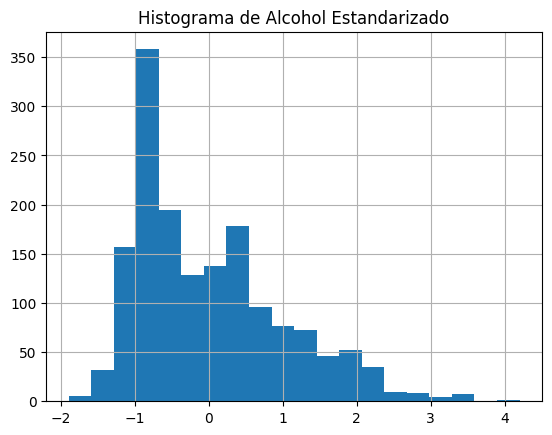

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar la variable alcohol
scaler = StandardScaler()
df['alcohol_scaled'] = scaler.fit_transform(df[['alcohol']])

# Visualizar el histograma de la variable alcohol estandarizada
df['alcohol_scaled'].hist(bins=20)
plt.title('Histograma de Alcohol Estandarizado')
plt.show()



In [ ]:
from scipy.stats import norm

# Calcular la probabilidad de obtener un nivel de alcohol menor a 10
mean = df['alcohol'].mean()
std = df['alcohol'].std()

# Probabilidad utilizando la distribución normal
prob = norm.cdf(10, loc=mean, scale=std)
print(f'Probabilidad de tener alcohol < 10: {prob}')


Probabilidad de tener alcohol < 10: 0.34571380272954244


In [ ]:
# Calcular la correlación entre todas las variables y la calidad
correlation = df.corr()
print(correlation['quality'].sort_values(ascending=False))

# Elegir la variable más correlacionada con la calidad
X = df[['alcohol']]  # Variable explicativa
y = df['quality']    # Variable respuesta


quality                 1.000000
alcohol                 0.476166
alcohol_scaled          0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Separar en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


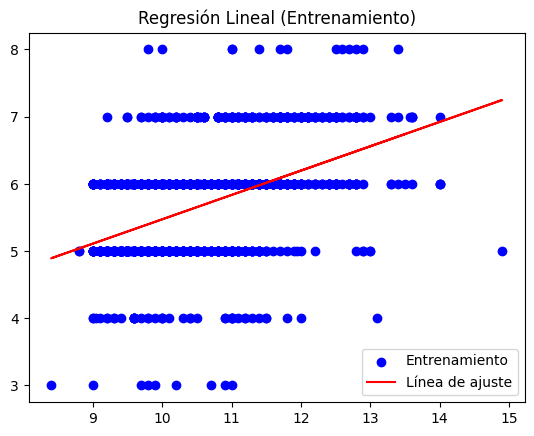

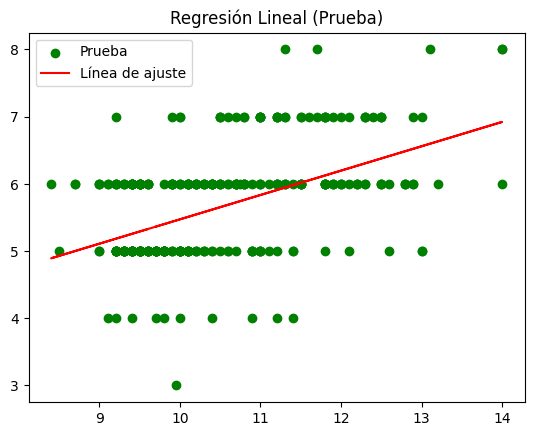

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de entrenamiento y prueba
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Visualización de la dispersión de datos y la línea de ajuste
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.plot(X_train, y_pred_train, color='red', label='Línea de ajuste')
plt.title('Regresión Lineal (Entrenamiento)')
plt.legend()
plt.show()

plt.scatter(X_test, y_test, color='green', label='Prueba')
plt.plot(X_test, y_pred_test, color='red', label='Línea de ajuste')
plt.title('Regresión Lineal (Prueba)')
plt.legend()
plt.show()


In [ ]:
# Mostrar los coeficientes (betas) de la regresión
print(f'Beta (pendiente): {model.coef_[0]}')
print(f'Intercepto: {model.intercept_}')


Beta (pendiente): 0.3623146935156422
Intercepto: 1.8492942045171596


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular RMSE y R² para el conjunto de entrenamiento y prueba
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'RMSE Entrenamiento: {rmse_train}, R^2 Entrenamiento: {r2_train}')
print(f'RMSE Prueba: {rmse_test}, R^2 Prueba: {r2_test}')


RMSE Entrenamiento: 0.7107990664889502, R^2 Entrenamiento: 0.22342286653437893
RMSE Prueba: 0.7067730428312582, R^2 Prueba: 0.23561797203976986
